In [1]:
%matplotlib inline
import os
import sys
sys.path.append("../src/")

import numpy as np
import cv2
import matplotlib.pyplot as plt

from image_utils import read_image, read_profile
from image_utils import reduce_mask, expand_mask, reverse_mask
from image_utils import extract_border, merge_images
from background import vignetteEffect, textureEffect

In [2]:
test_dir = "../test/"

input_dir = os.path.join(test_dir,"input/")

image_dir = os.path.join(input_dir, "image/")
profile_dir = os.path.join(input_dir, "profile/")
texture_dir = os.path.join(input_dir, "texture/")

In [3]:
# image 디렉토리의 파일명과 profile 디렉토리의 파일명은 동일함. 
# 이름을 기준으로 mapping되어 있음
filenames = os.listdir(image_dir) 
filename = filenames[-1]

imagepath = os.path.join(image_dir,filename)
image = read_image(imagepath)

profilepath = os.path.join(profile_dir,filename)
profile = read_profile(profilepath)

texturenames = os.listdir(texture_dir)
texturename = texturenames[0]
texturepath = os.path.join(texture_dir,texturename)
texture = read_image(texturepath)

## backGround 연산

### 1. change  BackGround

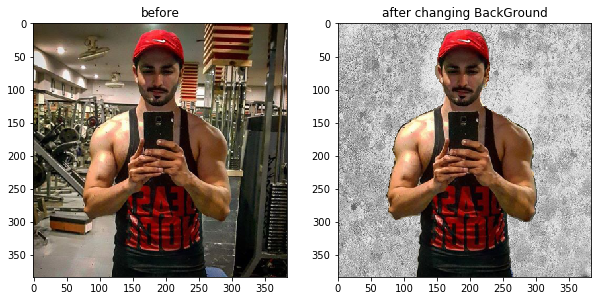

In [4]:
before = image
mask = profile

height, width = image.shape[:2]
texture = cv2.resize(texture,(width,height))
after = merge_images(before,texture,mask)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title('before')
ax.imshow(before)
ax = fig.add_subplot(122)
ax.set_title('after changing BackGround')
ax.imshow(after)

### 2. vignetteEffect

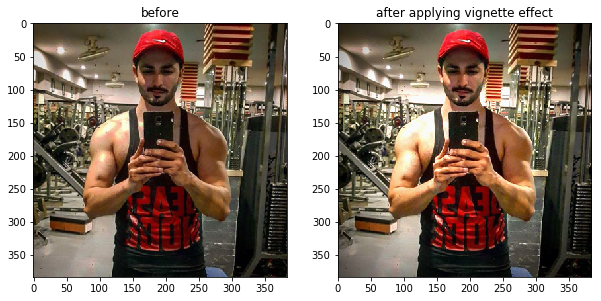

In [5]:
before = image

height, width = image.shape[:2]
after = vignetteEffect(image, 0.8, 1.2, 0.8, 1.2)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title('before')
ax.imshow(before)
ax = fig.add_subplot(122)
ax.set_title('after applying vignette effect')
ax.imshow(after)

### 3. textureEffect

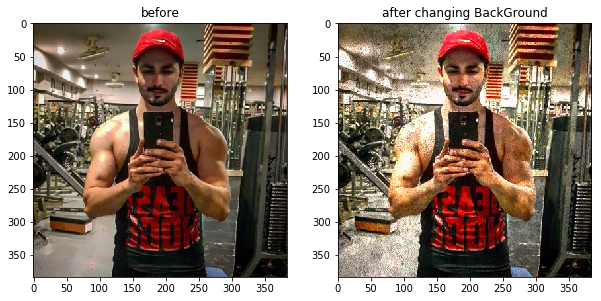

In [6]:
before = image
mask = profile

height, width = image.shape[:2]
after = textureEffect(before, texture, 0.8)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title('before')
ax.imshow(before)
ax = fig.add_subplot(122)
ax.set_title('after changing BackGround')
ax.imshow(after)